In [1]:
# kaggle competitions download -c dogs-vs-cats

In [2]:
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:00<01:37, 8.73MB/s]
  0%|          | 2.00M/812M [00:00<01:28, 9.61MB/s]
  0%|          | 3.00M/812M [00:00<03:05, 4.57MB/s]
  1%|          | 5.00M/812M [00:00<02:18, 6.09MB/s]
  1%|          | 6.00M/812M [00:00<02:12, 6.37MB/s]
  1%|          | 7.00M/812M [00:01<02:17, 6.16MB/s]
  1%|          | 8.00M/812M [00:01<02:15, 6.23MB/s]
  1%|          | 9.00M/812M [00:01<02:18, 6.08MB/s]
  1%|          | 10.0M/812M [00:01<02:17, 6.14MB/s]
  1%|▏         | 11.0M/812M [00:01<02:18, 6.05MB/s]
  1%|▏         | 12.0M/812M [00:02<02:16, 6.12MB/s]
  2%|▏         | 13.0M/812M [00:02<02:18, 6.06MB/s]
  2%|▏         | 14.0M/812M [00:02<02:19, 5.98MB/s]
  2%|▏         | 15.0M/812M [00:02<02:19, 6.00MB/s]
  2%|▏         | 16.0M/812M [00:02<02:14, 6.21MB/s]
  2%|▏         | 17.0M/812M [00:03<03:48, 3.65MB/s]
  2%|▏         | 18.0M/812M [00:03<03:28, 3.99MB/s]
  2%|▏         | 19.0M/812M [00:03<03:01, 4.59MB/s]
  3%|▎         | 21.

In [3]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os

# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [6]:
file_names = os.listdir('train/')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
# from google.colab.patches import cv2_imshow

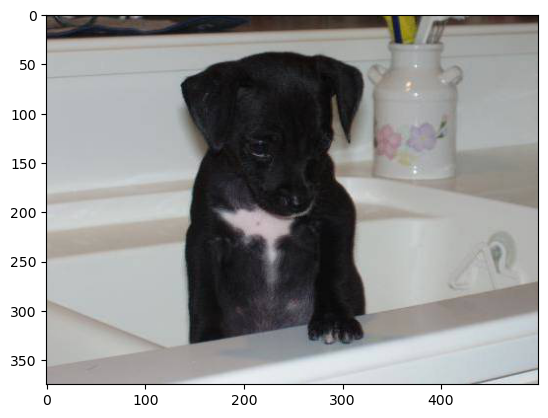

In [8]:
img = mpimg.imread('train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

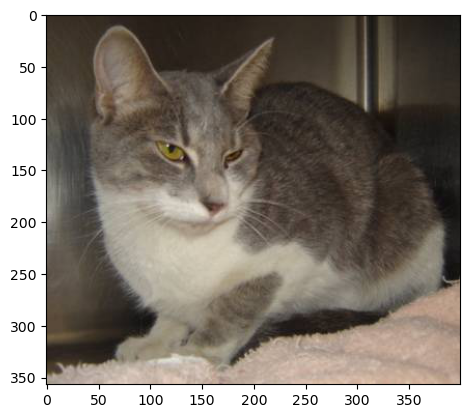

In [9]:
img = mpimg.imread('train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [10]:
#creating a directory for resized images
os.mkdir('image resized')

In [11]:
original_folder = 'train/'
resized_folder = 'image resized/'

for i in range(3000): 
    filename = os.listdir(original_folder)[i*8]
    img_path = original_folder+filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder+filename
    img.save(newImgPath)

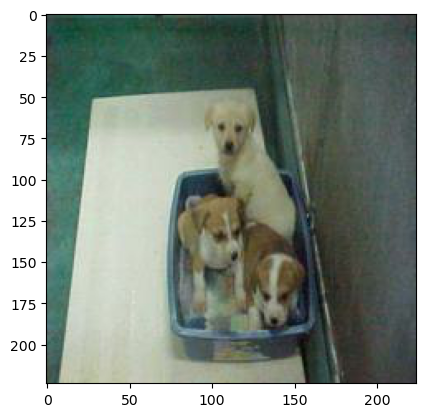

In [12]:
# display resized dog image
img = mpimg.imread('image resized/dog.8443.jpg')
imgplt = plt.imshow(img)
plt.show()

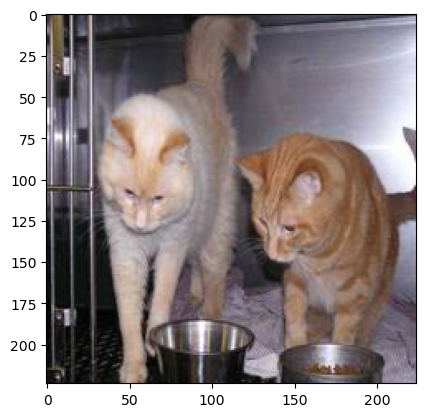

In [13]:
# display resized cat image
img = mpimg.imread('image resized/cat.5769.jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
# creaing a for loop to assign labels
filenames = os.listdir('image resized/')


labels = []

for i in range(3000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [15]:
print(filenames[0:1000])
print(len(filenames))

['cat.0.jpg', 'cat.10003.jpg', 'cat.10010.jpg', 'cat.10018.jpg', 'cat.10025.jpg', 'cat.10032.jpg', 'cat.1004.jpg', 'cat.10047.jpg', 'cat.10054.jpg', 'cat.10061.jpg', 'cat.10069.jpg', 'cat.10076.jpg', 'cat.10083.jpg', 'cat.10090.jpg', 'cat.10098.jpg', 'cat.10104.jpg', 'cat.10111.jpg', 'cat.10119.jpg', 'cat.10126.jpg', 'cat.10133.jpg', 'cat.10140.jpg', 'cat.10148.jpg', 'cat.10155.jpg', 'cat.10162.jpg', 'cat.1017.jpg', 'cat.10177.jpg', 'cat.10184.jpg', 'cat.10191.jpg', 'cat.10199.jpg', 'cat.10205.jpg', 'cat.10212.jpg', 'cat.1022.jpg', 'cat.10227.jpg', 'cat.10234.jpg', 'cat.10241.jpg', 'cat.10249.jpg', 'cat.10256.jpg', 'cat.10263.jpg', 'cat.10270.jpg', 'cat.10278.jpg', 'cat.10285.jpg', 'cat.10292.jpg', 'cat.103.jpg', 'cat.10306.jpg', 'cat.10313.jpg', 'cat.10320.jpg', 'cat.10328.jpg', 'cat.10335.jpg', 'cat.10342.jpg', 'cat.1035.jpg', 'cat.10357.jpg', 'cat.10364.jpg', 'cat.10371.jpg', 'cat.10379.jpg', 'cat.10386.jpg', 'cat.10393.jpg', 'cat.1040.jpg', 'cat.10407.jpg', 'cat.10414.jpg', 'cat.10

In [16]:
print(labels[0:200])
print(len(labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3000


Converting all the resized images to numpy arrays

In [17]:
import cv2
import glob

In [18]:
image_directory = 'image resized/'
image_extension = ['jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [19]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[219 238 241]
   [222 241 244]
   [226 245 250]
   ...
   [ 32  33  43]
   [ 32  31  41]
   [ 33  32  42]]

  [[219 238 241]
   [222 241 244]
   [226 245 250]
   ...
   [ 35  34  43]
   [ 40  37  46]
   [ 44  41  50]]

  [[220 237 240]
   [224 241 244]
   [226 245 250]
   ...
   [ 39  35  40]
   [ 44  39  41]
   [ 50  45

In [20]:
type(dog_cat_images)

numpy.ndarray

In [21]:
print(dog_cat_images.shape)

(3000, 224, 224, 3)


In [22]:
X = dog_cat_images
Y = np.asarray(labels)

In [23]:
print(X,Y)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[219 238 241]
   [222 241 244]
   [226 245 250]
   ...
   [ 32  33  43]
   [ 32  31  41]
   [ 33  32  42]]

  [[219 238 241]
   [222 241 244]
   [226 245 250]
   ...
   [ 35  34  43]
   [ 40  37  46]
   [ 44  41  50]]

  [[220 237 240]
   [224 241 244]
   [226 245 250]
   ...
   [ 39  35  40]
   [ 44  39  41]
   [ 50  45

Train Test split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=200)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(3000, 224, 224, 3) (2400, 224, 224, 3) (600, 224, 224, 3)


In [26]:
# scaling the data between 0 and 1
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [27]:
print(X_train_scaled,X_test_scaled)

[[[[0.20784314 0.21960784 0.21176471]
   [0.21176471 0.22352941 0.21568627]
   [0.21568627 0.22745098 0.21960784]
   ...
   [0.34117647 0.34901961 0.44313725]
   [0.3372549  0.34509804 0.43921569]
   [0.33333333 0.34117647 0.43529412]]

  [[0.20784314 0.21960784 0.21176471]
   [0.21176471 0.22352941 0.21568627]
   [0.21568627 0.22745098 0.21960784]
   ...
   [0.3372549  0.34509804 0.43921569]
   [0.33333333 0.34117647 0.43529412]
   [0.33333333 0.34117647 0.43529412]]

  [[0.20784314 0.21960784 0.21176471]
   [0.21176471 0.22352941 0.21568627]
   [0.21568627 0.22745098 0.21960784]
   ...
   [0.33333333 0.34509804 0.42745098]
   [0.32941176 0.34117647 0.42352941]
   [0.3254902  0.3372549  0.41960784]]

  ...

  [[0.31764706 0.36470588 0.38039216]
   [0.3254902  0.37254902 0.38823529]
   [0.32941176 0.37647059 0.39215686]
   ...
   [0.45490196 0.29803922 0.34117647]
   [0.45098039 0.29411765 0.3372549 ]
   [0.44705882 0.29019608 0.33333333]]

  [[0.31372549 0.36078431 0.37647059]
   [0.3

In [28]:
# Building the neural network
import tensorflow as tf
import tensorflow_hub as hub

In [29]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [30]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [32]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
75/75 [==============================] - 76s 718ms/step - loss: 0.1782 - acc: 0.9229
Epoch 2/5
75/75 [==============================] - 50s 660ms/step - loss: 0.0665 - acc: 0.9787
Epoch 3/5
75/75 [==============================] - 46s 610ms/step - loss: 0.0514 - acc: 0.9792
Epoch 4/5
75/75 [==============================] - 46s 613ms/step - loss: 0.0399 - acc: 0.9875
Epoch 5/5
75/75 [==============================] - 47s 621ms/step - loss: 0.0346 - acc: 0.9875


In [33]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

19/19 [==============================] - 19s 625ms/step - loss: 0.0378 - acc: 0.9867
Test Loss = 0.03776976093649864
Test Accuracy = 0.9866666793823242


1/1 [==============================] - 2s 2s/step
[[ 4.0814314 -3.6654274]]
0
The image represents a Cat


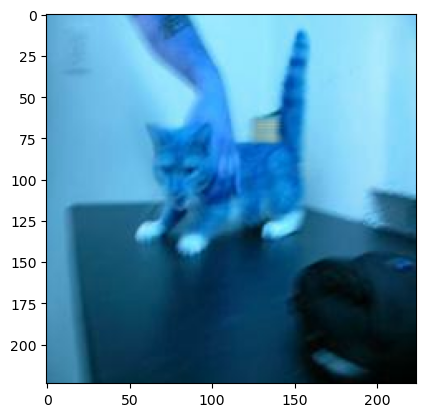

In [34]:
# Predictive System
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

In [35]:
# Saving the trained model

In [36]:
fileName = './trained_model'
# Save the model
tf.saved_model.save(model, fileName)

INFO:tensorflow:Assets written to: ./trained_model\assets


INFO:tensorflow:Assets written to: ./trained_model\assets


tf.Tensor([[-2.1213782  1.9928871]], shape=(1, 2), dtype=float32)
1
The image represents a Dog


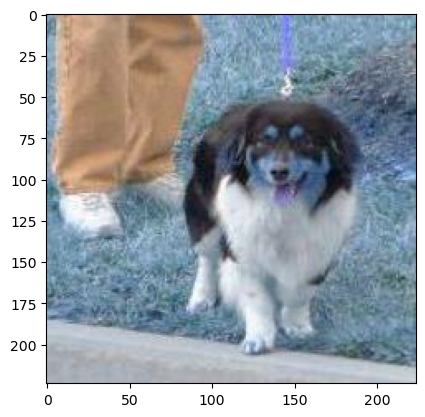

In [37]:
loaded_model = tf.saved_model.load('./trained_model')

# Predictive System
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

input_image_tensor = tf.convert_to_tensor(input_image_scaled, dtype=tf.float32)
input_image_tensor = tf.expand_dims(input_image_tensor, axis=0)
input_image_tensor = tf.image.resize(input_image_tensor, [224, 224])

input_prediction = loaded_model(input_image_tensor, True, None)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')